This is our Artificial Intelligence Assigment in the class, we were instructed to implement one of the machine learning algorithms without using machine learning libraries like *sklearn*, *PyTorch* or *TensorFlow*.


The biggest reason we use Neural Network because **we want to know how the Neural Network algorithm works** and **Neural Network is easy to implement**.

This notebook is proof of our learning process so it is far from perfect. Therefore, we ask for it to be corrected if you find a mistake.

Thanksss :))

Happy Reading!!!



# 1. Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


# 2. Dataset Identification

## 2.1. Import Dataset

In [2]:
df=pd.read_csv("../input/glass/glass.csv")

## 2.2. Identification the Missing Data (NaN Data)

In [3]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
RI,0,0.0
Na,0,0.0
Mg,0,0.0
Al,0,0.0
Si,0,0.0
K,0,0.0
Ca,0,0.0
Ba,0,0.0
Fe,0,0.0
Type,0,0.0


There is no missing data in the dataset

## 2.3. See Some Data

In [4]:
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00,6
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20,2
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
10,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2


There are 9 columns that contain the quantity values of the glass constituent elements and 1 column that describes the type of glass

In [5]:
df.shape #Size of Dataset

(214, 10)

This data consists of 10 features and 214 rows. Where 1 feature named 'Type' is a Feature target which is used as a comparison in the model

## 2.4. Describe the Numerical Feature

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The 'Type' feature is read as numeric data, even though the numbers are the labeling of the type of glass. **We need an action on this feature**

It can be seen that the mean and median of the 'Type' feature is in the range of 2, this indicates that **the dataset is imbalanced** and leads to type 2 glass.

<Figure size 432x288 with 0 Axes>

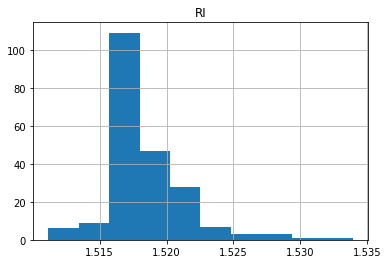

<Figure size 432x288 with 0 Axes>

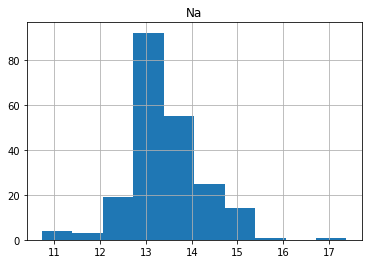

<Figure size 432x288 with 0 Axes>

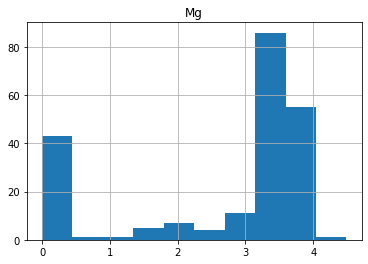

<Figure size 432x288 with 0 Axes>

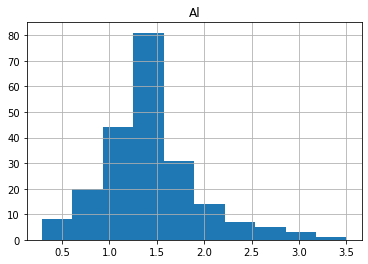

<Figure size 432x288 with 0 Axes>

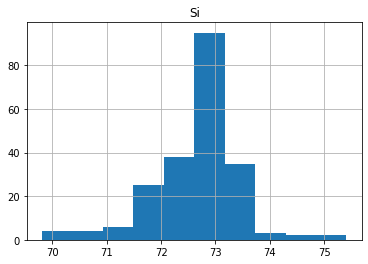

<Figure size 432x288 with 0 Axes>

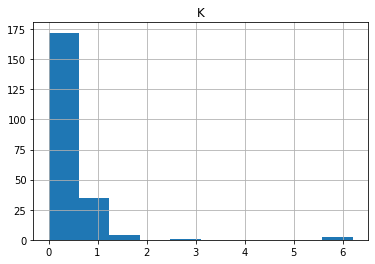

<Figure size 432x288 with 0 Axes>

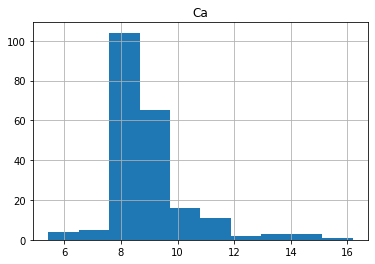

<Figure size 432x288 with 0 Axes>

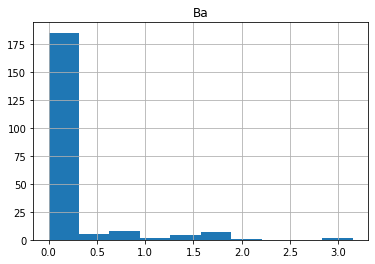

<Figure size 432x288 with 0 Axes>

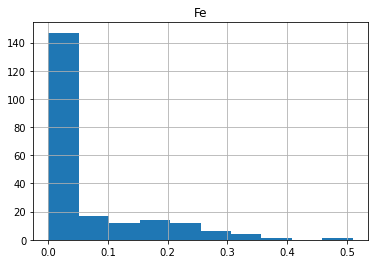

<Figure size 432x288 with 0 Axes>

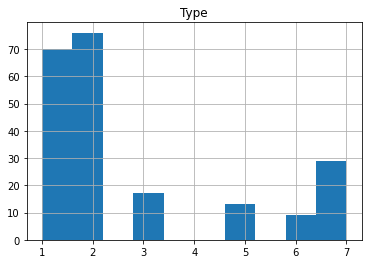

In [7]:
for column in df:
    plt.figure()
    df.hist([column])

The numbers between the features are quite far apart, so we need to do some scaling. The scaling method used is the *standardscaler* 

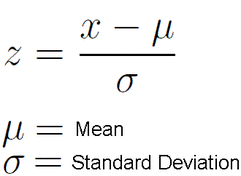

### 2.5 Outliers Data

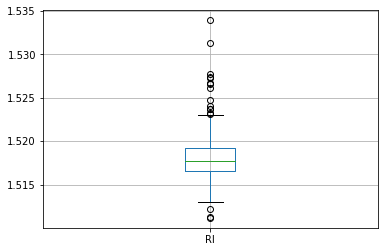

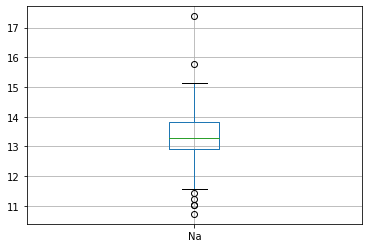

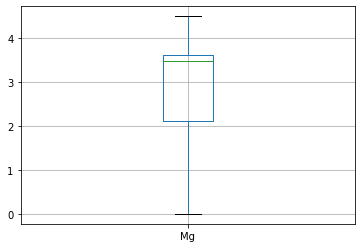

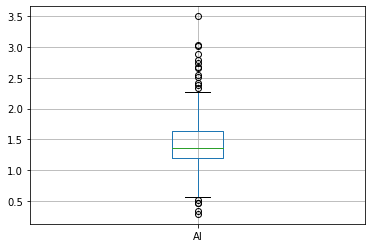

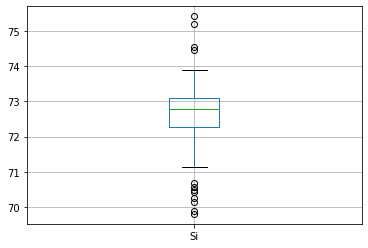

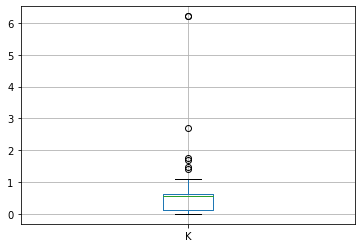

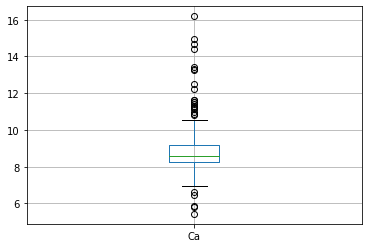

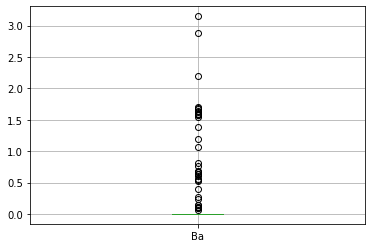

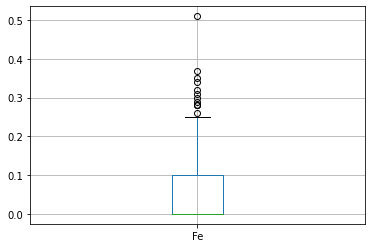

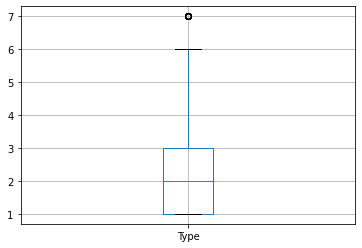

In [8]:
for column in df:
    plt.figure()
    df.boxplot([column])

We can see in the 'Ba' column there are a lot of data outliers. Ideally, we remove the outliers, but because there are too many outliers in this small dataset, we will not process the outliers. 

## 2.6. Describe the Categorical Feature

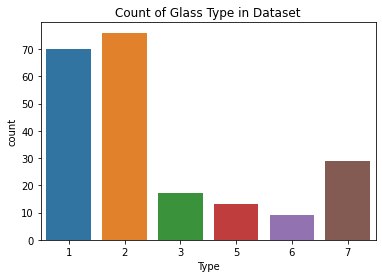

In [9]:
# count plot on single categorical variable
sns.countplot(x ='Type', data = df).set(title='Count of Glass Type in Dataset')
 
# Show the plot
plt.show()

We can see that the data rows whose target features have values 1 and 2 are more than the others with a significant difference. This dataset is imbalance. To minimize the impact of imbalanced data, **we will randomize the data rows before modeling**.

## 2.7 Correlation between Features/Column

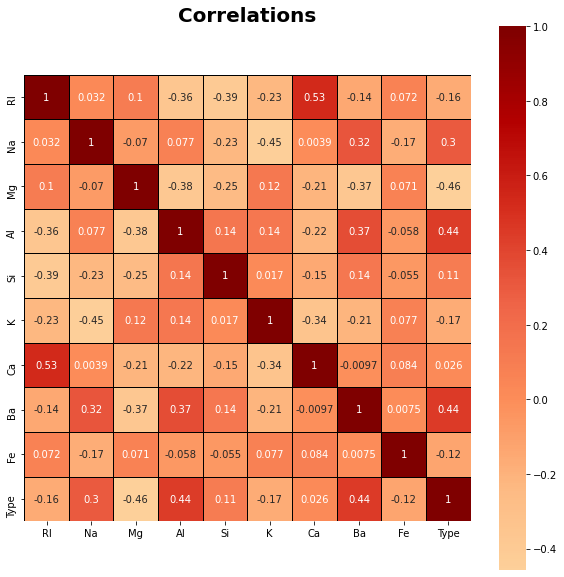

In [10]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
## in order to reverse the bar replace "RdBu" with "RdBu_r"
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(method='kendall'), annot=True,mask = False,cmap = 'OrRd', linewidths=.7, linecolor='black',fmt='.2g',center = 0,square=True)

plt.title("Correlations", y = 1.03,fontsize = 20, fontweight = 'bold', pad = 40);

We use the **Kendall Tau correlation coefficient** for numeric data input and categorical output

'Ca' and 'Ri' have the greatest correlation, which is 0.53.

'Al', 'Ba', and 'Na' have a fairly large positive correlation to the target feature 'Type' with correlations of 0.44, 0.44, and 0.3 respectively.

'Mg' has a high negative correlation to the target feature 'Type' with 0.46.

In the neural network, we try to include all the features even though the correlation to the target feature has a small value like 'Ca'

In data identification we get several things:
* The dataset has 214 rows with 9 columns containing the quantity values of the constituent elements and 1 target column named 'Type'.
* There is no missing data in the dataset.
* Parse feature 'Type' into 7 columns. For example, if the Feature 'Type' has a value of 3, then it becomes [0 0 1 0 0 0 0].
* The dataset is imbalanced, we will randomize the data rows before modeling.
* The numbers between the features are quite far apart, so we need to do some scaling. We will use *Standardscaler*.
* Too many outliers in this small dataset. Therefore, we will not process the outliers. 
* Some features have a fairly large correlation with the target feature 'Type'

# 3. Neural Network

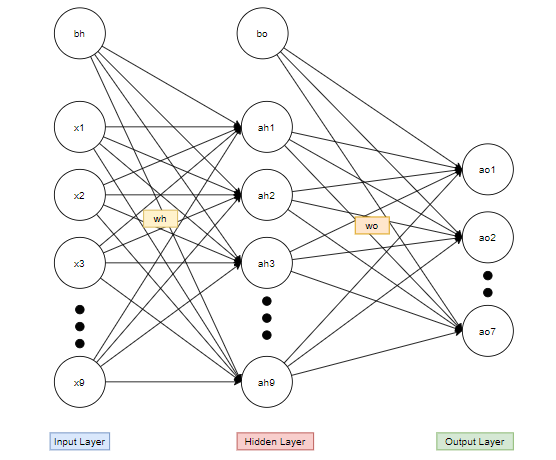

**In the picture there are 9 nodes hidden layer, it should be 10**

The image above is the neural network architecture that will be created. There are 9 nodes on the input layer, 10 nodes on the hidden layer, and 7 nodes on the output layer.

*wh* is the weight from the input layer to the hidden layer, *wo* is the weight from the hidden layer to the output layer, *bh* is bias on hidden layer, and *bo* is bias on output layer.

The following are the steps that occur in the neural network :

## 3.1.  Parameter initialization (*wh, bh, wo, bo*)

We initialize the parameter matrix sizes *wh, bh, wo, bo* and initialize their values with random numbers.
* *wh* matrix has size 9 x 10
* *bh* matrix has size 10 x 1
* *wo* matrix has size 10 x 7
* *bo* matriks has size 7 x 1


**[Code will be shown in chapter 5 (implementation)]**

## 3.2. Forward Propagation

This is a process in the neural network that occurs every data rows (**for example in the first row**)

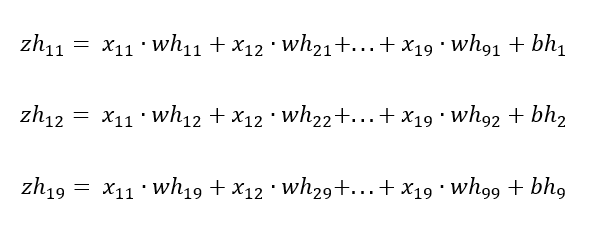

*x* is the input matrix, its size is like the size of the dataset (214,9)

We can see that *zh* is the sum of multiplication the rows of the *x* matrix and the columns of the *wh* matrix plus the bias *bh*. 

**We can simplify that *zh* matrix is the dot product of *x* matrix  and *wh* matrix plus *bh*** 

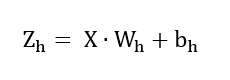

Next we will perform an activation function on the Zh matrix,in multi-label classification, the hidden layer uses **sigmoid** and the output layer uses **softmax**. For each value in Zh matrix :

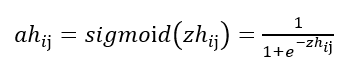

then *ah* is processed as *x* in the previous process with *wo* and *bo* parameters (**for example in the first row**)

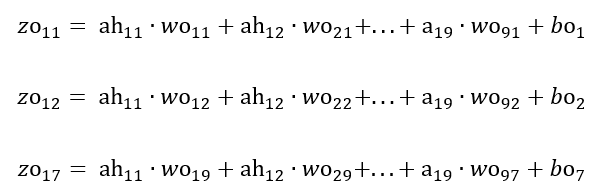

**We can simplify that *zo* matrix is the dot product of *ah* matrix  and *wo* matrix plus *bo*** 

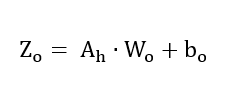

Finally, we will implement the softmax activation function for each value in Zo

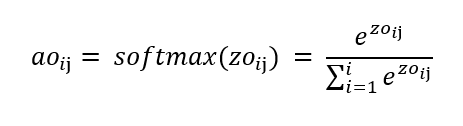

*ao* is the predicted result of the neural network, which will be compared with the actual value. then we will do **back-propagation** to change the value of weight and bias


## 3.3. Cost Function

We use the cross entropy function to compare the predicted value and the actual value, for each rows :
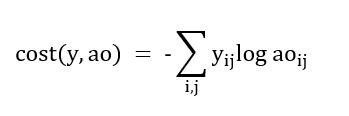

*y* is the actual value and *ao* is the predicted value

## 3.4. Back-Propagation

We will see how far the cost function changes with the parameters we want to change each iteration.

We do the derivative of the cost function with respect to the parameters we want to change



### 3.4.1. *wo* Parameters

We uses chain rule

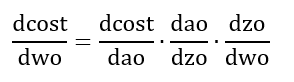

We get :

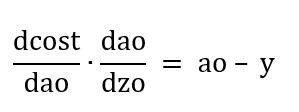

[see https://deepnotes.io/softmax-crossentropy]

and : 

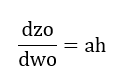

so : 

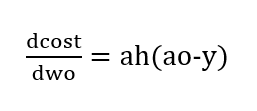


### 3.4.2. *bo* Parameters

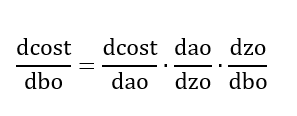

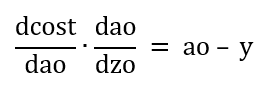

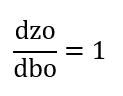

so :

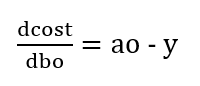


### 3.4.3. *wh* Parameters

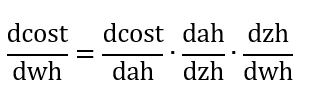

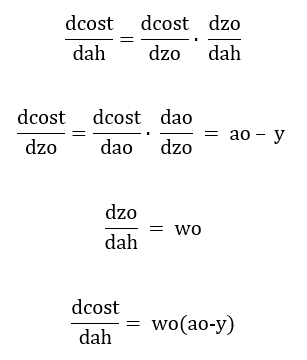

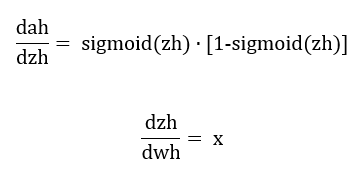

We get :

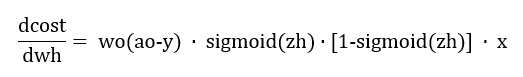

### 3.4.4. *bh* Parameters

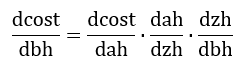



From the previous point we know :

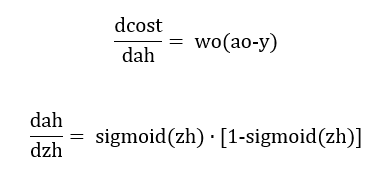

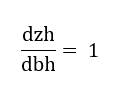

We get :

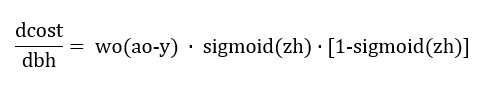

### 3.4.5. ADAM Optimization

Previously, we used a gradient decent algorithm to update the weights and biases, but it takes a lot of iterations, to achieve 80% accuracy it takes 3 million iterations. Therefore we use another optimization method, namely ADAM.

We initiate each parameters the things below first :

m0 = 0

v0 = 0

beta1=0.9

beta2=0.999

eta=10**(-8)

eta(learning rate) = 0.001

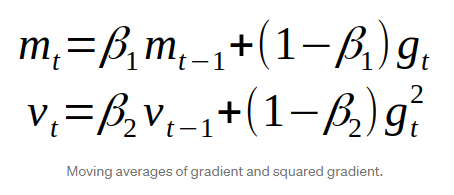

t is iteration. g is the derivative of the cost function of the parameters we change such as *wh, wo, bh, and bo*

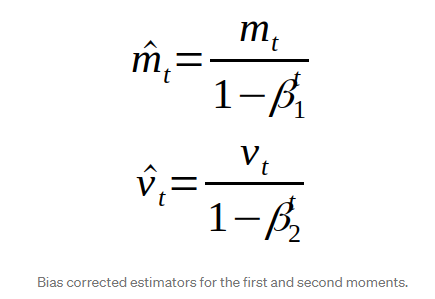

Then, we update the bias and weight :

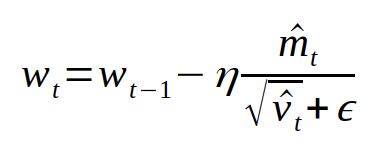

We apply this algorithm to different *g* and *w* according to the parameters you want to change. For exmple to update *wh* :

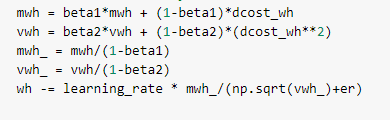

**We will do forward propagation and backpropagation continuously during the iteration, to get the best weight and bias**

# 4. K-fold Cross Validation

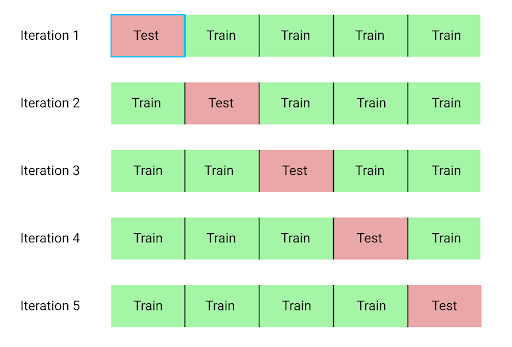

We will train our model by dividing the train data as shown above and testing with the test data as shown above. Each iteration is compared with the actual data, then gets an accuracy score, then the score is averaged to get an average validation score

# 5. Implementation

In [11]:
# Impor library-library yang dibutuhkan pada cell ini
from urllib import request
import csv
from codecs import iterdecode

# Dapatkan file dataset dalam bentuk CSV
dataset_url = "https://gist.github.com/comfyte/09c86bb880aa9b151b0bdafa79a89282/raw/af12c3fb4a76605e9c79c626910ce63f53b6c16b/glass-dataset.csv"
csv_object = request.urlopen(dataset_url)

# Lompati baris paling pertama yang hanya berisi header
next(csv_object)

# Sesuaikan agar iterable mengeluarkan item-item yang telah didekode
csv_rows = iterdecode(csv_object, "utf-8")

# Baca objek CSV yang berisi dataset yang akan digunakan
raw_content = csv.reader(csv_rows, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)

# Ubah semua data menjadi bentuk NumPy Array (n-dimensional array atau ndarray)
all_data = np.array(list(raw_content))

# Acak urutan seluruh data agar lebih merata dalam training
df = all_data
all_data = np.take(df, np.random.permutation(df.shape[0]), axis=0, out=df)

# Pisahkan keseluruhan data menjadi data input dan data output (bentuk numerik)
input_data = all_data[:, :-1]
output_data_num = all_data[:, -1].astype(int)

## 5.1. Define a function to convert from numeric data form to feature set

In [12]:
def output_num_to_feat(value: int, value_range: range):
    return [(1 if n == value else 0) for n in value_range]

def output_feat_to_num(array: np.ndarray):
    return np.nonzero(array == 1)[1] + 1

## 5.2. Convert the output data into a feature set and save it in a new variable

In [13]:
MIN_NUM = min(output_data_num)
MAX_NUM = max(output_data_num)

output_data_feat = np.array([output_num_to_feat(n - MIN_NUM, range(MAX_NUM))
                             for n in output_data_num])

## 5.3. Define a function to perform *scaling* on input data

In [14]:
def scale_inputs(x, mean_values=None, std_values=None):    
    feature_length = x.shape[1]
    
    compute_own = (mean_values is None) or (std_values is None)

    if compute_own:
        mean_values = []
        std_values = []
    elif len(mean_values) != len(std_values) != feature_length:
        raise ValueError()
    
    for i in range(feature_length):
        if compute_own:
            mean_values.append(np.mean(x[:, i]))
            std_values.append(np.std(x[:, i]))
        
        x[:, i] = (x[:, i] - mean_values[i]) / std_values[i]

    if compute_own:
        return mean_values, std_values

## 5.4. Define the mathematical functions that will be needed

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

## 5.5. Define a class that represents a Neural Network instance

In [16]:
# input data & output data dikeluarain/dipindah jadi ke yang def train(?)
import numpy as np

class Neural:
    def __init__(self, attributes, output_labels, hidden_nodes_count):
        """
        Inisialisasikan sebuah instance ANN (model) baru
        """
        # Berikan seed pada randomizer di NumPy
        np.random.seed(42)

        # Mulai menginisialisasi parameter-parameter yang dibutuhkan
        parameters = {}

        parameters["wh"] = np.random.rand(attributes, hidden_nodes_count)
        parameters["bh"] = np.random.randn(hidden_nodes_count)

        parameters["wo"] = np.random.rand(hidden_nodes_count, output_labels)
        parameters["bo"] = np.random.randn(output_labels)

        self.parameters = parameters

    def train(self, feature_set, output_data, iter_count, learning_rate):
        """
        Latih model yang telah dibuat
        """
        for _ in range(0, iter_count):
            self.__forward_propagation(feature_set)
            self.__backward_propagation(feature_set, output_data)
            self.__update_weights(learning_rate)

    def predict(self, inp, in_num_form = False):
        """
        Method untuk memprediksi data baru
        """
        ao = self.__forward_propagation(inp)
        predictions = np.array([[(1 if n == max(row) else 0) for n in row]
                                for row in ao])
        
        if in_num_form:
            return output_feat_to_num(predictions)

        return predictions

    # Fungsi-fungsi pembantu (helper functions)
    def __forward_propagation(self, feature_set):
        wh = self.parameters['wh']
        bh = self.parameters['bh']
        wo = self.parameters['wo']
        bo = self.parameters['bo']

        zh = np.dot(feature_set, wh) + bh
        ah = sigmoid(zh)

        # Phase 2
        zo = np.dot(ah, wo) + bo
        ao = softmax(zo)
        self.cache = {"zh": zh,
                      "ah": ah,
                      "zo": zo,
                      "ao": ao}
        return ao
    
    def __backward_propagation(self, feature_set, outp):
        ao = self.cache["ao"]
        ah = self.cache["ah"]
        zh = self.cache["zh"]
    
        wh = self.parameters['wh']
        bh = self.parameters['bh']
        wo = self.parameters['wo']
        bo = self.parameters['bo']
    
        # Phase 1
        dcost_dzo = ao - outp
        dzo_dwo = ah
        dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
        dcost_bo = dcost_dzo

        # Phase 2
        dzo_dah = wo
        dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
        dah_dzh = sigmoid_der(zh)
        dzh_dwh = feature_set
        dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    
        dcost_bh = dcost_dah * dah_dzh
        self.grads = {"dcost_wh": dcost_wh,"dcost_bh": dcost_bh,"dcost_wo":dcost_wo ,"dcost_bo": dcost_bo}

    def __update_weights(self, learning_rate):
        dcost_wh = self.grads["dcost_wh"]
        dcost_bh = self.grads["dcost_bh"]
        dcost_wo = self.grads["dcost_wo"]
        dcost_bo = self.grads["dcost_bo"]

        wh = self.parameters['wh']
        bh = self.parameters['bh']
        wo = self.parameters['wo']
        bo = self.parameters['bo']

        #ADAM
        beta1=0.9
        beta2=0.999
        er=10**(-8)

        mwh=0
        vwh=0
        mbh=0
        vbh=0
        mwo=0
        vwo=0
        mbo=0
        vbo=0

        #Untuk node hidden layer
        mwh = beta1*mwh + (1-beta1)*dcost_wh
        vwh = beta2*vwh + (1-beta2)*(dcost_wh**2)
        mwh_ = mwh/(1-beta1)
        vwh_ = vwh/(1-beta2)
        wh -= learning_rate * mwh_/(np.sqrt(vwh_)+er)
        

        #untuk bias hidden layer
        mbh = beta1*mbh + (1-beta1)*dcost_bh.sum(axis=0)
        vbh = beta2*vbh + (1-beta2)*(dcost_bh.sum(axis=0)**2)
        mbh_ = mbh/(1-beta1)
        vbh_ = vbh/(1-beta2)
        bh -= learning_rate * mbh_/(np.sqrt(vbh_)+er)
        

        #Untuk node output layer
        mwo = beta1*mwo + (1-beta1)*dcost_wo
        vwo = beta2*vwo + (1-beta2)*(dcost_wo**2)
        mwo_ = mwo/(1-beta1)
        vwo_ = vwo/(1-beta2)
        wo -= learning_rate * mwo_/(np.sqrt(vwo_)+er)
        

        #Untuk bias output layer
        mbo = beta1*mbo + (1-beta1)*dcost_bo.sum(axis=0)
        vbo = beta2*vbo + (1-beta2)*(dcost_bo.sum(axis=0)**2)
        mbo_ = mbo/(1-beta1)
        vbo_ = vbo/(1-beta2)
        bo -= learning_rate * mbo_/(np.sqrt(vbo_)+er)


        self.parameters = {"wh": wh,
                           "bh": bh,
                           "wo": wo,
                           "bo": bo}

## 5.6. Define a function to measure the accuracy of prediction results against real data

In [17]:
def check_accuracy(prediction_result, actual_data):
    if prediction_result.shape != actual_data.shape:
        raise ValueError("Ukuran data input dan output tidak sesuai!")

    rows, = prediction_result.shape
    correct_count = 0
    for i in range(rows):
        if prediction_result[i] == actual_data[i]:
            correct_count += 1

    accuracy_rate = correct_count / rows
    return accuracy_rate

## 5.7. Testing the model that has been made on the same data as the real data

In [18]:
input_data_2 = input_data.copy()
scale_inputs(input_data_2)

test_same_data = Neural(input_data_2.shape[1], output_data_feat.shape[1], 10)
test_same_data.train(input_data_2, output_data_feat, 5000, 0.001)

prediction_result = test_same_data.predict(input_data_2)
print("Train Accuracy:",
      check_accuracy(output_feat_to_num(prediction_result), output_data_num))

Train Accuracy: 0.9345794392523364


## 5.8 Define the *iterator* function to separate (*split*) data *input* and *output* with the K-Fold method

In [19]:
from math import floor

def kfold_iterable(k_count: int, inp: np.ndarray, outp: np.ndarray):
    # Jangan lakukan pass-by-reference agar tidak menimbulkan side-effect
    inp = inp.copy()
    outp = outp.copy()

    if len(inp) != len(outp):
        raise ValueError()
    
    data_length = len(inp)
    chunk_size = floor(data_length / k_count)
 
    def k_split(data, iter):
        needle = iter * chunk_size
 
        training = np.concatenate((data[: needle], data[needle + chunk_size :]))
        testing = data[needle : needle + chunk_size]
 
        return training, testing
 
    i = 0
    while i < k_count:
        training_data = {}
        testing_data = {}
 
        training_data["input"],  testing_data["input"]  = k_split(inp, i)
        training_data["output"], testing_data["output"] = k_split(outp, i)
 
        yield training_data, testing_data, i+1
        i += 1

## 5.9 Validation of model implementation results using the K-Fold Cross-Validation method

In [20]:
# Selalu gunakan "otak" yang sama pada setiap iterasi k-fold
brain = Neural(input_data.shape[1], output_data_feat.shape[1],10)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

# Kumpulkan nilai-nilai akurasi yang didapatkan untuk dapat dihitung reratanya
accuracies = []

# Lakukan iterasi untuk mengeksekusi metode k-fold cross-validation
for training_data, testing_data, i in kfold_iterable(5,
                                                     input_data,
                                                     output_data_feat):
    training_input = training_data["input"]
    training_output = training_data["output"]

    training_input = sc.fit_transform(training_input)
    

    testing_input = testing_data["input"]
    testing_input = sc.transform(testing_input)

    actual_output = output_feat_to_num(testing_data["output"])
 
    brain.train(training_input, training_output, 5000, 0.001)
    prediction_result = brain.predict(testing_input, True)

    accuracy = check_accuracy(prediction_result, actual_output)
    print(f"Akurasi saat iterasi ke-{i} adalah sebesar {accuracy}")

    # Tambahkan ke kumpulan nilai-nilai akurasi
    accuracies.append(accuracy)

# Hitung rata-rata dari keseluruhan nilai-nilai akurasi yang terdapatkan
print("Rata-rata keseluruhan akurasi adalah sebesar", np.mean(accuracies))

Akurasi saat iterasi ke-1 adalah sebesar 0.6666666666666666
Akurasi saat iterasi ke-2 adalah sebesar 0.7142857142857143
Akurasi saat iterasi ke-3 adalah sebesar 0.8333333333333334
Akurasi saat iterasi ke-4 adalah sebesar 0.7619047619047619
Akurasi saat iterasi ke-5 adalah sebesar 0.6666666666666666
Rata-rata keseluruhan akurasi adalah sebesar 0.7285714285714285


# 6. Conclusion 

* The model is able to make training accuracy of 93%+
* The average validation score is 72+%
* The model is overfitting because when it is validated the score is far below the training accuracy score


# 7. References
* https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification
* https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c